# -------------------------------Bank Marketing Campaign----------------------------------------

#  Problem Statement

# What is a Deposit 

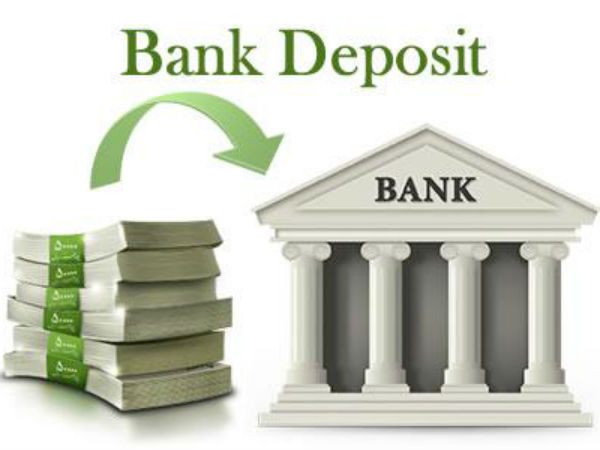

# Data Content
### Dataset contains Total 17 columns/Features :
#### Bank Client Data¶

 


### Info related with the last contact of the current campaign:
 

##### Other Attributes:

#### Output variable (desired target):
 

# ------------------------------------------List of Objectives--------------------------------------


# 1. EDA
# 2. Data Visualization & Data Cleaning
# 3. Feature Engineering & Encoding Category
# 4. Data Preprocessing
# 5. Model Training and Model Evaluation
# 6. Conclusion
 

#  1.EDA and Visualization


### import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataset


In [2]:
df = pd.read_csv("bank dataset")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Check Null Values


In [3]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* There is no null values in  dataset

### Check duplicate values

In [4]:
df.duplicated().sum()


0

### Data Types

In [5]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

### Sta Info Data

In [6]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df['deposit'].value_counts()/df.shape[0]


no     0.52616
yes    0.47384
Name: deposit, dtype: float64

### Data Balance

Check data is balance or not i.e Total % of Yes/No category


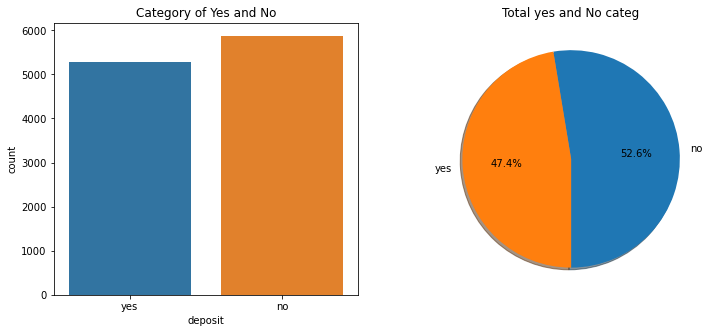

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()


* As seen Data is balance i.e 50-50 % of yes/no binary category


* If not balance then its can balance by random oversampling

## 2.Data Visualization & Data Cleaning

### A . Visualization of Catg features:

In [9]:
df_cat = df.select_dtypes(include='object').columns.drop(["deposit","job"])
df_cat


Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

#### Count Plot

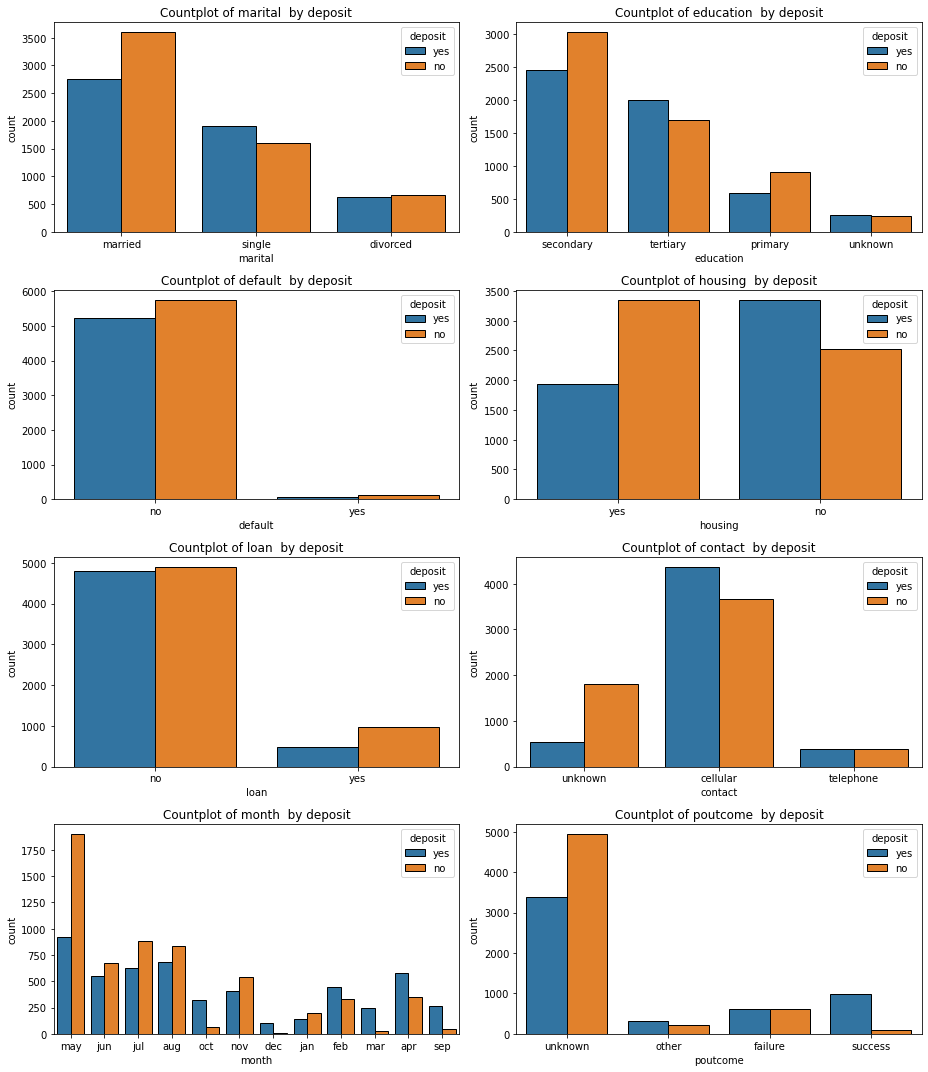

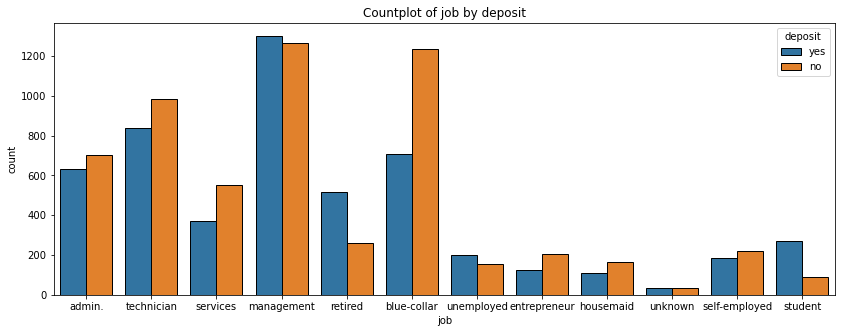

In [10]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='deposit',data=df,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',edgecolor="black",data=df)
plt.title("Countplot of job by deposit")
plt.show()


#### conclusion

* single person is more likely to subscribed for deposit as compared to married one


* people with no housing loan are more likely to subscribed the term deposit


* cellular contact has more chances that person will subscribed the term deposit while unknown has very very less



* In month of may the most of call was done(around 2500), while in Dec month this was very very less(below 200)

* students and retired people has more likely to subscribed the term deposit

### B. Visualization of Num features

#### 1. Scater Plot

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous
7 deposit


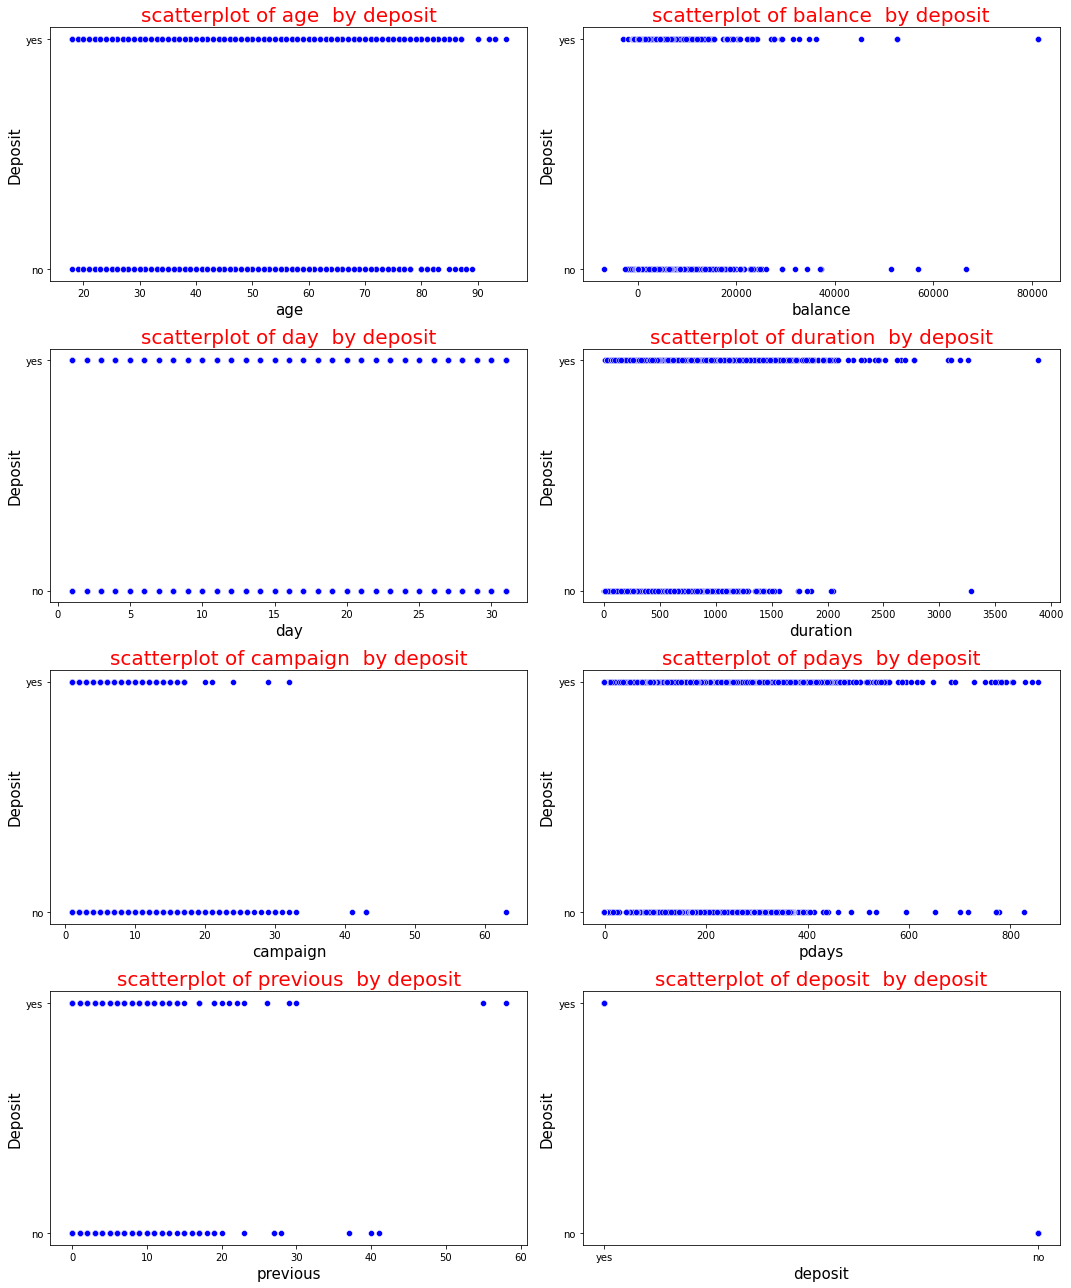

In [11]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='deposit' ,data=df_num,color='blue')
    plt.title("scatterplot of {}  by deposit".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()


### 2.Box Plot


0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


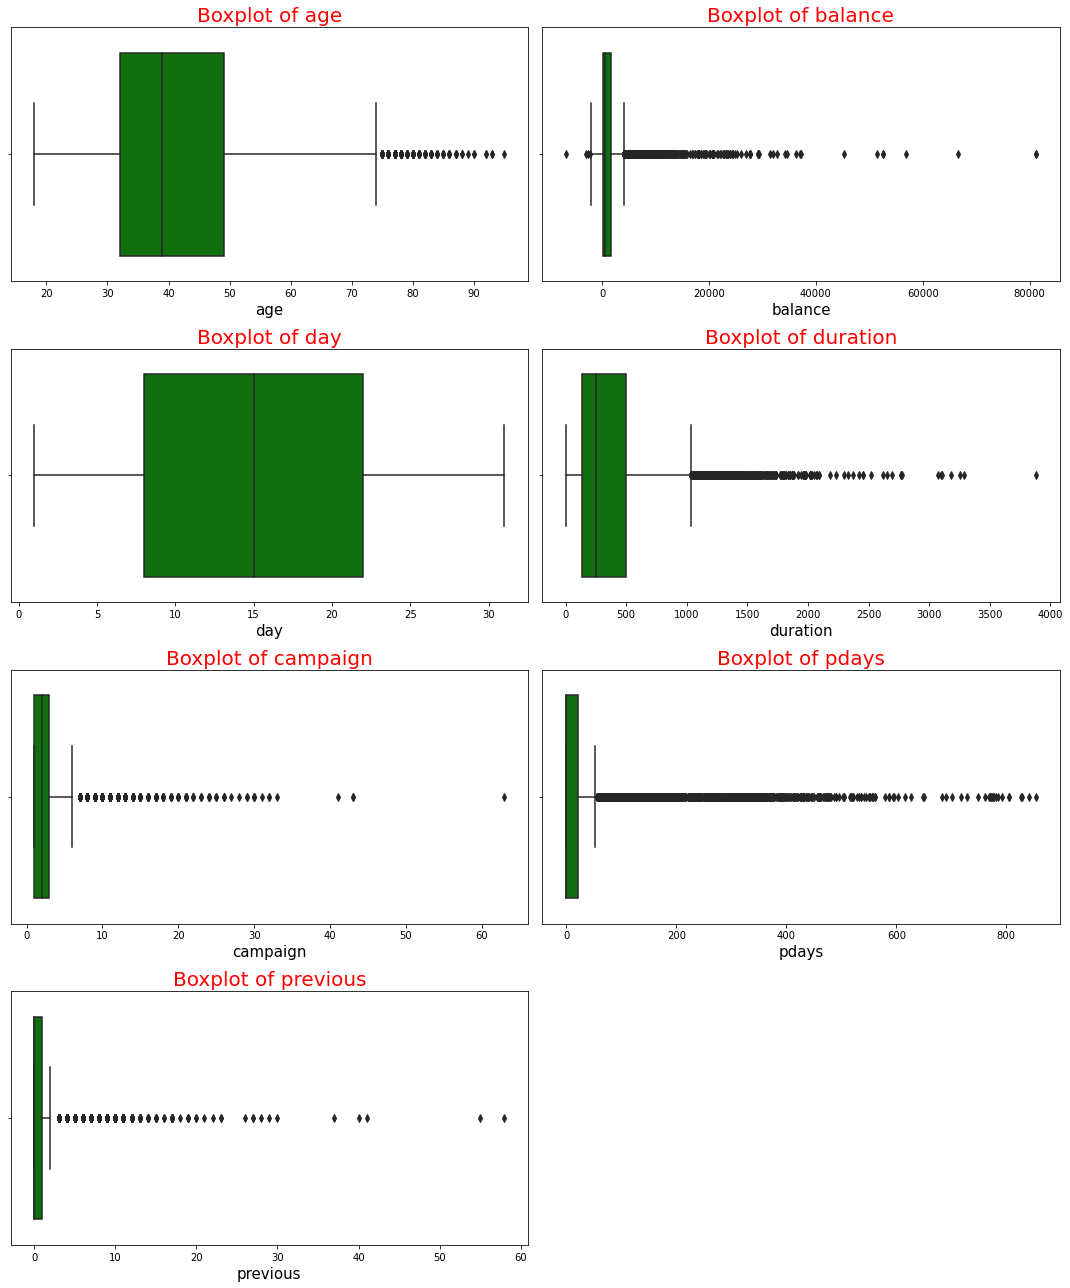

In [12]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()


### Conclusion

* Duration is matter most clearly seen from above plot higher the duration more the chances that person will subscrised for deposit

* lower Campaign higher the chances that person will subscrised for deposit and 
pdays should be more


* People those susbcribed for deposit has higher balance


### Handling Outliers


### 1. Balance

In [13]:
len(df[df['balance']<0])/len(df)


0.061637699337036375

In [14]:
df[(df['balance']>40000)|(df['balance']<0)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
17,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,yes
23,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
42,45,entrepreneur,divorced,tertiary,no,-395,yes,no,unknown,13,may,470,1,-1,0,unknown,yes
59,57,technician,married,tertiary,no,-1,no,no,unknown,14,may,850,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,39,management,married,tertiary,no,-974,no,yes,cellular,13,aug,130,4,-1,0,unknown,no
11120,50,management,married,tertiary,no,-516,yes,no,unknown,15,may,226,2,-1,0,unknown,no
11132,32,blue-collar,married,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11145,60,retired,divorced,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no


### Drops Negavive values of balance


* As we know Bank balace should not be negative <br> 
* There are some records with negative balance and very high balace which acts as major outliers <br> 
* So we will drop this line break <br> 


In [15]:
df.drop(df[(df['balance']>40000)|(df['balance']<0)].index,inplace=True,axis=0)


### 2. Duration


df[df['duration']>3000]


Drop records with duration above 3000 which acts as major outliers

In [16]:
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)


### 3. campaign


In [17]:
df[df['campaign']>40]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6927,51,blue-collar,married,unknown,no,41,yes,no,telephone,9,jul,16,43,-1,0,unknown,no
7139,42,blue-collar,married,primary,no,170,yes,no,unknown,19,may,51,41,-1,0,unknown,no
7240,33,blue-collar,married,secondary,no,0,yes,yes,cellular,31,jul,16,43,-1,0,unknown,no
7635,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no


### Drop major outliers of compaign column


In [18]:
df.drop(df[df['campaign']>30].index,axis=0,inplace=True)


### 4. pdays


In [19]:
df[df['pdays']==-1]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [20]:
df[df['poutcome']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [21]:
df[df['previous']==0]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


### Concluion

* As seen above pdays -1 means these peoples are new or involving 1st time in campaign and <br>
* they have no previous contact so previous ==0 and poutcomes is unknown for all -1 values of pdays <br>
* we will drop pdays columns <br>


### Drop pdays columns from above conclusion

In [22]:
df.drop("pdays",inplace=True,axis=1)

### 5. Previous


In [23]:
df[df['previous']>30]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
2013,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,58,other,yes
3677,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,55,failure,yes
6274,27,blue-collar,married,secondary,no,821,yes,yes,unknown,16,sep,23,1,41,other,no
8713,35,technician,single,secondary,no,4645,yes,no,cellular,11,jan,502,3,40,other,no
10121,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,37,other,no


### Drop outliers in previous features


In [24]:
df.drop(df[df['previous']>30].index,axis=0,inplace=True)


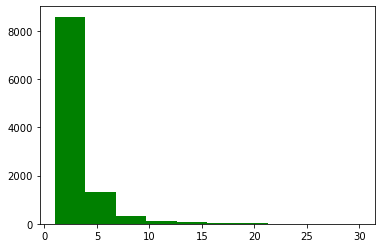

In [59]:
#df1 = df[df['balance']>0]
plt.hist(x="campaign",data=df,color='green')
plt.show()


In [26]:
df1 = df.copy()


### conclusion:

* Duration is matter most clearly seen from above plot higher the duration more the chances that person will subscrised for deposit <br>
* Campaign should be low as possible <br>
* pdays should be more <br>
* People those susbcribed for deposit has higher balance <br>


### Correlation Heatmap

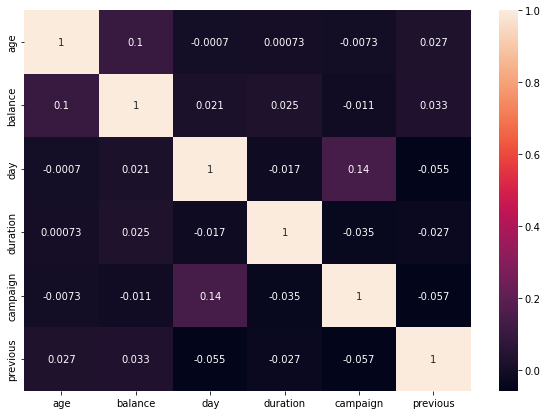

In [61]:
#Pearson’s Correlations, which measures the strength of a linear relationship
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous']]
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot=True)
plt.show()


* There is No Multi-colinearity Problem as No relation with inputs columns


## 3.Encoding Category

### Encoding of Categ Features

* A categorical variable is one that has two or more categories (values).<br>
* There are two types of categorical variable, nominal and ordinal. A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering.


In [28]:
#create dict for binary encoding
dic = {"yes":1,"no":0}


In [29]:
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    df[i] = df[i].map(dic)


In [30]:
# Ordinal Encoding
l=['month',"contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)


In [31]:
# OneHot Encoding 
df = pd.get_dummies(df, columns = ['job','marital','education'])


In [32]:
df


,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
11158,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
11159,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
11160,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


#### Reset Index 


* Make correction in Index No


In [33]:
df=df.reset_index()


In [34]:
df.drop('index',axis=1,inplace=True)


In [35]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
10445,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
10446,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
10447,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


## 4.Data Preprocessing

### Import Library


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


### Split Inputs and Output features

* X - Independent Varables (Inputs features)
* Y - Dependent Varables (target or output variable)


In [37]:
X = df.drop('deposit',axis=1)
Y = df['deposit']


In [38]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10444    0
10445    0
10446    0
10447    0
10448    0
Name: deposit, Length: 10449, dtype: int64

### StratifiedShuffleSplit -- To make equal category ratio for train and test data set


* StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. Using StratifiedShuffleSplit the proportion of distribution of class labels is almost even between train and test dataset.<br>
* The major difference between StratifiedShuffleSplit and StratifiedKFold (shuffle=True) is that in StratifiedKFold, the dataset is shuffled only once in the beginning and then split into the specified number of folds. This discards any chances of overlapping of the train-test sets.<br>
* However, in StratifiedShuffleSplit the data is shuffled each time before the split is done and this is why there’s a greater chance that overlapping might be possible between train-test sets.<br>


In [39]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]


### Category Ratio for Train & Test dataset

In [40]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])


Ratio for train dataset
0    0.51504
1    0.48496
Name: deposit, dtype: float64

ratio for test dataset
0    0.515152
1    0.484848
Name: deposit, dtype: float64


### Train and Test dataset


In [41]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']


In [42]:
X_train

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
5461,28,0,674,1,0,1,14,8,921,4,...,0,0,0,0,1,0,1,0,0,0
4220,36,0,324,1,1,0,16,5,830,1,...,0,0,0,0,1,0,0,1,0,0
5530,56,0,1480,1,1,0,5,3,576,1,...,1,0,0,1,0,0,0,1,0,0
4249,31,0,26965,0,0,0,21,0,654,2,...,0,0,0,0,0,1,1,0,0,0
9514,30,0,177,1,0,0,9,0,62,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,34,0,425,1,0,0,16,5,1389,7,...,0,0,0,0,1,0,1,0,0,0
4223,27,0,11862,0,0,0,25,9,285,2,...,1,0,0,0,0,1,0,0,1,0
343,26,0,551,0,0,0,8,5,531,1,...,0,0,0,0,0,1,0,1,0,0
4449,41,0,5517,1,0,0,10,5,584,1,...,0,0,0,0,1,0,0,1,0,0


### Features Scaling -

* Feature Scaling is a technique to normalize/standardize the independent features present in the dataset in a fixed range.<br>
* As there are some algorithms such as Logistic regression KNN SVM that required scaling data to maximize accuracy<br>


In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)


## 5.Model Training and Model Evaluation


### Model Training 


* Train model with differents classification algorithms<br>
* compare performance and accuray of differents algorithms<br>
* Calculate cross validation score<br>
* Compare their recall score<br>


#### Import all library need for model training


In [44]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


### Logistic Regression


In [45]:
lr= LogisticRegression()

lr.fit(X_train_s,Y_train)
Y_pred_lr = lr.predict(X_test_s)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,Y_train))



Testing Accuracy of LogisticRegression :  0.7894736842105263
Training Accuracy of LogisticRegression :  0.7950505879135904


### SVM (Suport Vector Machine)

In [46]:
svm=svm.SVC(kernel='linear')

svm.fit(X_train_s,Y_train)
Y_pred_svm = svm.predict(X_test_s)

print("Testing Accuracy of SVM : ",metrics.accuracy_score(Y_test,Y_pred_svm))

print("Training Accuracy of SVM : ",svm.score(X_train_s,Y_train))


Testing Accuracy of SVM :  0.7933014354066986
Training Accuracy of SVM :  0.7955974842767296


### Decision Tree


In [47]:
dt= DecisionTreeClassifier()

dt.fi-t(X_train_s,Y_train)
Y_pred_dt = dt.predict(X_test_s)

print("Testing Accuracy of Decision Tree : ",metrics.accuracy_score(Y_test,Y_pred_dt))

print("Training Accuracy of Decision Tree : ",dt.score(X_train_s,Y_train))


Testing Accuracy of Decision Tree :  0.7830940988835726
Training Accuracy of Decision Tree :  1.0


### K-Nearest Neighbours(KNN)


In [48]:
knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_s,Y_train)
Y_pred_knn = knn.predict(X_test_s)

print("Testing Accuracy of KNN : ",metrics.accuracy_score(Y_test,Y_pred_knn))

print("Training Accuracy of KNN : ",knn.score(X_train_s,Y_train))


Testing Accuracy of KNN :  0.7282296650717703
Training Accuracy of KNN :  0.8185671315285753


In [63]:
l = list(range(1,25,2))
for i in l:
    knn1= KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train_s,Y_train)
    Y_pred = knn1.predict(X_test_s)
    accuracy = metrics.accuracy_score(Y_test,Y_pred)
    train_acc = knn1.score(X_train_s,Y_train)
    print(f"For K={i} test accuracy score is {accuracy} :".format(i,accuracy))
    print(f"For K={i} train accuracy score is {accuracy} :".format(i,train_acc))
    print()


For K=1 test accuracy score is 0.703030303030303 :
For K=1 train accuracy score is 0.703030303030303 :

For K=3 test accuracy score is 0.7250398724082935 :
For K=3 train accuracy score is 0.7250398724082935 :

For K=5 test accuracy score is 0.7282296650717703 :
For K=5 train accuracy score is 0.7282296650717703 :

For K=7 test accuracy score is 0.727591706539075 :
For K=7 train accuracy score is 0.727591706539075 :

For K=9 test accuracy score is 0.7355661881977671 :
For K=9 train accuracy score is 0.7355661881977671 :

For K=11 test accuracy score is 0.7349282296650718 :
For K=11 train accuracy score is 0.7349282296650718 :

For K=13 test accuracy score is 0.7317384370015949 :
For K=13 train accuracy score is 0.7317384370015949 :

For K=15 test accuracy score is 0.733652312599681 :
For K=15 train accuracy score is 0.733652312599681 :

For K=17 test accuracy score is 0.7317384370015949 :
For K=17 train accuracy score is 0.7317384370015949 :

For K=19 test accuracy score is 0.7288676236

### Gaussian Naive Bayes

In [50]:
nb= GaussianNB()

nb.fit(X_train_s,Y_train)
Y_pred_nb = nb.predict(X_test_s)

print("Testing Accuracy of Naive Bayes : ",metrics.accuracy_score(Y_test,Y_pred_knn))

print("Training Accuracy of Naive Bayes : ",nb.score(X_train_s,Y_train))


Testing Accuracy of Naive Bayes :  0.7282296650717703
Training Accuracy of Naive Bayes :  0.7108285479901558


### Random Forest

In [51]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

print("Testing Accuracy of RF : ",metrics.accuracy_score(Y_test,Y_pred_rf))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of RF : ",rf.score(X_train,Y_train))


Testing Accuracy of RF :  0.8376395534290271
Training Accuracy of RF :  1.0


### Hyperparamter Tunning

### SVM


In [52]:
from sklearn import svm


In [53]:
svm1=svm.SVC()
C=[0.05,0.2,0.4,0.6,0.8,1,2,5]
hyper={'C':C}
model=GridSearchCV(estimator=svm1, param_grid=hyper,cv=10)
model.fit(X_train_s,Y_train)
print(model.best_score_)
print(model.best_estimator_)


0.8024380854133494
SVC(C=1)


In [54]:
gd_best=model.best_estimator_
gd_best.fit(X_train_s, Y_train)


SVC(C=1)

In [55]:
print("Test Accuracy :",gd_best.score(X_test_s,Y_test))
print("Train Accuracy :",gd_best.score(X_train_s,Y_train))


Test Accuracy : 0.7977671451355662
Train Accuracy : 0.8424938474159147


In [70]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1615
           1       0.81      0.82      0.82      1520

    accuracy                           0.82      3135
   macro avg       0.82      0.82      0.82      3135
weighted avg       0.82      0.82      0.82      3135

[[1324  291]
 [ 269 1251]]


## Confusuion Matrix :


* A confusion matrix is a technique for summarizing the performance of a classification algorithm.<br>
* Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.


* Accuracy - Accuracy is the measure of total performance of classification model and it is simply a ratio of correctly predicted observation to the total observations.<br>

* Accuracy = TP+TN/TP+FP+FN+TN<br>

* Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.<br>

* Precision = TP/TP+FP<br>

* Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.<br>

* Recall = TP/TP+FN<br>

* F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.<br>

* F1 Score = 2(Recall Precision) / (Recall + Precision)<br>



## Random Forest

In [65]:
rf1 =RandomForestClassifier(random_state=0,n_estimators=200,max_features=25,max_depth=10,min_samples_leaf=50)
rf1.fit(X_train_s,Y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = rf1.predict(X_train_s)
y_test_preds = rf1.predict(X_test_s)


In [66]:
print(rf1.score(X_test_s,Y_test))
print(rf1.score(X_train_s,Y_train))

0.8213716108452951
0.8311457478807766


In [67]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1615
           1       0.81      0.82      0.82      1520

    accuracy                           0.82      3135
   macro avg       0.82      0.82      0.82      3135
weighted avg       0.82      0.82      0.82      3135

[[1324  291]
 [ 269 1251]]


## Confusion Matrix By Random Forest


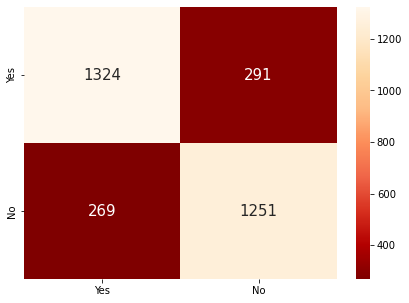

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test,y_test_preds),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,xticklabels=['Yes','No'],yticklabels=['Yes','No'],
            annot_kws={"fontsize":15})
plt.show()


## 6.Conclusion



### Duration
* Duration play very important role to predict either customer will subscribed term deposit or not?<br>
* Because if company has more call duraction with thier customers and explain them their services , higher the chances that they will subscribed for term deposit but these will not work if target customer did not receive the call<br>
* For Duration more than 700 has more than 80% possibility that person will subscribed term deposit
### Contact
* Contact also very much important features, should prefer cellular contact<br>
* unknown contact means new customers or 1st time involving in campaign have very less chances that they will susbscibed for deposit
### poutcomes


* poutcomes - outcome of the previous marketing campaign<br>
* customers those subcribed for term deposit in previous campaign has more chances that they will subscribed for this one too<br>
* while unknown has very less chances
### previous and loan
* company should have more contact with thier customers so that they always be activate<br>
* Peoples with No housing loan are more likely to subscribed for terms depoist so these will be target
### Job
* peoples with blue collar job are not likely to subscribed for deposit while job students as they actually are<br>
* lower age has less chances while middle & higher age will be target
### Age and Balance
* Age group between(59-95) and (17-29) has on average possiblity above 70% to subscribed term deposit<br>
* Balance peoples with higher bank balance has more chances to subscribed<br>
* Balance Above 2700 has prob of on average 55-60% to subscribed term deposit
